# Load Data from json line file

In [23]:
# Import Libraries

from pyspark import SparkContext
from pyspark.sql import SparkSession

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [33]:


# Instantiate SparkContext
spark_sc=SparkContext.getOrCreate()

spark=SparkSession(spark_sc)

# Read json data in to the DataFrame
data = spark.read.json("assignment_data.jsonl")

#Display 10 first rows of data context
data.show(10)

+-------+-----+--------------------+--------------------+-------------------+
|country|event|           player_id|          session_id|                 ts|
+-------+-----+--------------------+--------------------+-------------------+
|     PK|start|d6313e1fb7d247a6a...|674606b1-2270-428...|2016-11-22T20:40:50|
|   null|  end|20ac16ebb30a47708...|16ca9d01-d240-452...|2016-11-18T06:24:50|
|   null|  end|318e22b061b54042b...|5f933591-8cd5-414...|2016-11-16T18:01:37|
|   null|  end|29bb390d9b1b4b4b9...|ef939180-692a-484...|2016-11-13T10:38:09|
|     GH|start|a477ecabc3cc455cb...|4c55263e-66b2-481...|2016-11-29T19:31:43|
|     SK|start|1ec36a67785046b3b...|3346a60a-0989-404...|2016-11-16T05:36:16|
|     DE|start|9595af0063e94cb8a...|06830030-d091-428...|2016-11-07T01:18:09|
|   null|  end|8d0e3cd4a25d4a089...|a78a4889-4bcf-45a...|2016-11-24T02:12:33|
|   null|  end|e59f1fa31e144fd8b...|dd223ea6-0e6b-4dd...|2016-11-13T00:35:30|
|   null|  end|fd8a1e9fff25471da...|3015bf71-4b28-4c9...|2016-11

# How many sessions are in the dataset?

In [25]:
# Groupby data by session_id and count number of sessions
num_session_in_data=data.groupby('session_id').count()

# Display count of sessions in data and shows some Descriptive statistics of data (mean, stddv, min and max)
num_session_in_data.describe('session_id').show()

+-------+--------------------+
|summary|          session_id|
+-------+--------------------+
|  count|              500587|
|   mean|                null|
| stddev|                null|
|    min|00000934-5c74-4c1...|
|    max|ffffb31f-de89-46a...|
+-------+--------------------+



# how many sessions are completed per country?

In [26]:
#Create a temporary view of the table on memory that is used for running the requitres sql query
data.createOrReplaceTempView("sessionplayer")

query = """select a.country,COUNT(a.session_id) as count_session_per_country from sessionplayer a 
                                        Inner join sessionplayer b on a.session_id=b.session_id and a.event!=b.event 
                                        where a.country!="" 
                                        group by a.country"""

completed_session_per_country=spark.sql(query)

# Display number of sessions for each country 
completed_session_per_country.show()

+-------+-------------------------+
|country|count_session_per_country|
+-------+-------------------------+
|     DZ|                     1953|
|     MM|                     1996|
|     LT|                     2276|
|     TC|                     2206|
|     AZ|                     2670|
|     SC|                     1774|
|     FI|                     2349|
|     PM|                     2112|
|     UA|                     2141|
|     RO|                     2550|
|     KI|                     1662|
|     ZM|                     1680|
|     SL|                     2202|
|     SB|                     1626|
|     LA|                     2402|
|     NL|                     2247|
|     BW|                     2168|
|     BS|                     2239|
|     MN|                     2365|
|     PS|                     2011|
+-------+-------------------------+
only showing top 20 rows



# How many sessions are completed per player?

In [27]:
query = """select player_id, Count(session_id) from sessionplayer
                                          where event="end"
                                          GROUP by player_id"""

session_completed_per_player=spark.sql(query)

# Display number of sessions completed for each player
session_completed_per_player.show()



+--------------------+-----------------+
|           player_id|count(session_id)|
+--------------------+-----------------+
|05e73a69c41943498...|               25|
|465f81dfdee345669...|               33|
|522a28a053a44af69...|               46|
|3f282f08b347481b8...|               37|
|cd5742d5ad5247a79...|                3|
|3e888630d54e4dde9...|               42|
|3aa78890e9454b46b...|               20|
|fffa44da04a24d799...|               27|
|f147eebba02a4da3b...|               42|
|37370d0139544d1ca...|               50|
|e8f36a8efded42bfb...|               50|
|293da457fd584ea18...|               34|
|3cc80842b10c477d8...|               43|
|0395b10232f34d3eb...|               49|
|600894a22d3a4aa68...|               36|
|2325e83bc1d14c4fb...|               38|
|ec0a0483fddd4ebfa...|               49|
|154470fc7c23483c8...|               37|
|a677d0d5099d40008...|               46|
|5f96555b2e074e7aa...|               12|
+--------------------+-----------------+
only showing top

# What is the country with more sessions started during 2018?

In [28]:
quesry = """select country, count(session_id) from sessionplayer 
                                      where year(ts)="2018" and event="start" 
                                      group by country"""

country_with_more_sessions=spark.sql(query)

country_with_more_sessions.show()

+--------------------+-----------------+
|           player_id|count(session_id)|
+--------------------+-----------------+
|05e73a69c41943498...|               25|
|465f81dfdee345669...|               33|
|522a28a053a44af69...|               46|
|3f282f08b347481b8...|               37|
|cd5742d5ad5247a79...|                3|
|3e888630d54e4dde9...|               42|
|3aa78890e9454b46b...|               20|
|fffa44da04a24d799...|               27|
|f147eebba02a4da3b...|               42|
|37370d0139544d1ca...|               50|
|e8f36a8efded42bfb...|               50|
|293da457fd584ea18...|               34|
|3cc80842b10c477d8...|               43|
|0395b10232f34d3eb...|               49|
|600894a22d3a4aa68...|               36|
|2325e83bc1d14c4fb...|               38|
|ec0a0483fddd4ebfa...|               49|
|154470fc7c23483c8...|               37|
|a677d0d5099d40008...|               46|
|5f96555b2e074e7aa...|               12|
+--------------------+-----------------+
only showing top

# Plot the player sessions completed per country

<AxesSubplot:xlabel='country'>

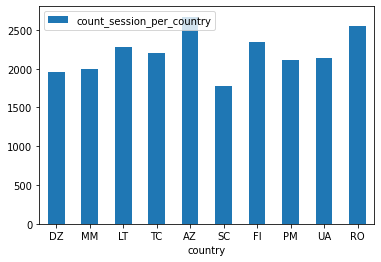

In [36]:
plt_session_completed_per_country=completed_session_per_country.limit(10)
pandas_df = plt_session_completed_per_country.toPandas()
pandas_df.plot.bar(x='country',y='count_session_per_country', rot=0)